#  My Valorant Analysis

Valorant is a team based (5v5) first-person tactical hero shooter game whoever wins the 13 rounds, wins the game.
My project's aim is to find whether the hypothesis below is correct or not:

In the end, the result of my hypothesis will answer my question whether I was a burden to the team or carried the team.

Before diving into proving the hypothesis part, I'd like to explain my dataset a bit. First of all, I only used competetive matches in my dataset. Unlike, unranked matches, competetive matches make it possible to match players with similar skill level. Therefore, it is possible to get more consisent data. Secondly, the dataset only contains the years between 2020-2021. The reason for that is because I stopped playing competetive matches specifically after 2021-10-15(can be seen in the data frame below) for various reasons. In other words, the data you see here contains all my competetive matches.


I found my valorant stats in a JSON format in tracker gg website. I had to get 12 JSON formated file to get all my competetive matches. Then I turned those JSONS into CSV files by using "CS210_MakeCSV.py" file. After that, I combined the CSV files by using "CS210_project_combineCSVs.py" file. 

Here, the combined CSV is turned into a data frame.

In [42]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Data Frame

In [43]:

# To see all the rows
pd.set_option("display.max_row", 1000)

csv_file_name = '/Users/ecemcakalli/Desktop/CS210_Project/Data Scraping/CS210_ProjectCombinedCSVs.csv'

df = pd.read_csv(csv_file_name, header=None)


#there were unnecessary informations about dates so I get rid of that part.
df[0] = df[0].str.split('T').str[0]

#also arranged percantages
df[16] = df[16].apply(lambda x: '{:.2f}'.format(float(x)) if x.replace('.', '', 1).isdigit() else x)
df[13] = df[13].apply(lambda x: '{:.2f}'.format(float(x)) if x.replace('.', '', 1).isdigit() else x)


#made the first row header and sort the data set according to date
df[0] = df[0].astype(str)
header = df.iloc[0]
df = df.iloc[1:].sort_values(by=0)
df = df.reset_index(drop=True)
df.columns = header


df


,Date,Playtime,Rank,Season,Result,Map,Agent,Rounds Won,Rounds Lost,Kills,Deaths,Assists,Headshots,Headshot Percentage,Damage,Received Damage,Kill Death Ratio
0,2020-09-18,41m 11s,Iron 3,E1: A2,victory,Split,Omen,13,9,22,14,2,5,6.49,2472,2594,1.57
1,2020-09-19,34m 55s,Bronze 1,E1: A2,victory,Split,Sage,13,6,18,13,8,3,7.14,3311,2635,1.38
2,2020-09-19,15m 04s,Bronze 2,E1: A2,defeat,Split,Omen,1,13,3,7,3,3,19.05,875,1160,0.43
3,2020-09-24,39m 08s,Iron 3,E1: A2,victory,Haven,Phoenix,13,9,11,14,2,3,6.12,2206,2752,0.79
4,2020-09-26,43m 36s,Iron 3,E1: A2,victory,Split,Cypher,13,8,17,14,6,8,16.13,3599,3486,1.21
5,2020-09-27,37m 42s,Iron 2,E1: A2,victory,Haven,Cypher,13,11,11,15,5,7,23.53,1947,2915,0.73
6,2020-10-02,37m 50s,Bronze 1,E1: A2,victory,Ascent,Cypher,13,7,11,10,5,8,36.00,2243,2020,1.10
7,2020-10-03,34m 19s,Bronze 1,E1: A2,victory,Ascent,Cypher,13,6,6,10,3,3,14.29,1493,1693,0.60
8,2020-10-03,40m 29s,Bronze 1,E1: A2,defeat,Bind,Phoenix,9,13,7,17,5,4,11.63,2042,3459,0.41
9,2020-10-13,36m 06s,Iron 3,E1: A2,victory,Ascent,Cypher,13,8,15,12,7,3,6.90,2556,2162,1.25


I added a new column called PlaytimeInSeconds in order to do compare Playtime - Damage and Playtime - Received Damage

In [44]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with 'Playtime' and 'Damage' columns
# Display the DataFrame with the new ratio column
def playtime_to_seconds(playtime):
    minutes, seconds = map(int, playtime[:-1].split("m"))
    total_seconds = minutes * 60 + seconds
    return total_seconds

# Apply the function to the 'Playtime' column
df['PlaytimeInSeconds'] = df['Playtime'].apply(playtime_to_seconds)

# Display the updated DataFrame
df

,Date,Playtime,Rank,Season,Result,Map,Agent,Rounds Won,Rounds Lost,Kills,Deaths,Assists,Headshots,Headshot Percentage,Damage,Received Damage,Kill Death Ratio,PlaytimeInSeconds
0,2020-09-18,41m 11s,Iron 3,E1: A2,victory,Split,Omen,13,9,22,14,2,5,6.49,2472,2594,1.57,2471
1,2020-09-19,34m 55s,Bronze 1,E1: A2,victory,Split,Sage,13,6,18,13,8,3,7.14,3311,2635,1.38,2095
2,2020-09-19,15m 04s,Bronze 2,E1: A2,defeat,Split,Omen,1,13,3,7,3,3,19.05,875,1160,0.43,904
3,2020-09-24,39m 08s,Iron 3,E1: A2,victory,Haven,Phoenix,13,9,11,14,2,3,6.12,2206,2752,0.79,2348
4,2020-09-26,43m 36s,Iron 3,E1: A2,victory,Split,Cypher,13,8,17,14,6,8,16.13,3599,3486,1.21,2616
5,2020-09-27,37m 42s,Iron 2,E1: A2,victory,Haven,Cypher,13,11,11,15,5,7,23.53,1947,2915,0.73,2262
6,2020-10-02,37m 50s,Bronze 1,E1: A2,victory,Ascent,Cypher,13,7,11,10,5,8,36.00,2243,2020,1.10,2270
7,2020-10-03,34m 19s,Bronze 1,E1: A2,victory,Ascent,Cypher,13,6,6,10,3,3,14.29,1493,1693,0.60,2059
8,2020-10-03,40m 29s,Bronze 1,E1: A2,defeat,Bind,Phoenix,9,13,7,17,5,4,11.63,2042,3459,0.41,2429
9,2020-10-13,36m 06s,Iron 3,E1: A2,victory,Ascent,Cypher,13,8,15,12,7,3,6.90,2556,2162,1.25,2166


In [45]:
# HERE I'AM MAKING THE COLUMNS NUMERIC
df['PlaytimeInSeconds'] = pd.to_numeric(df['PlaytimeInSeconds'], errors='coerce')
#df['PlaytimeInSeconds']
df['Damage'] = pd.to_numeric(df['Damage'], errors='coerce')
#df['Damage']
df['Received Damage'] = pd.to_numeric(df['Received Damage'], errors='coerce')
#df['Received Damage']

# Scatter Plots

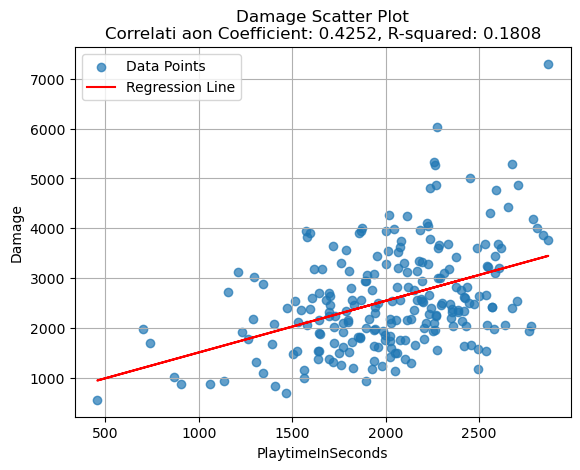

Correlation Coefficient: 0.4252
R-squared: 0.1808


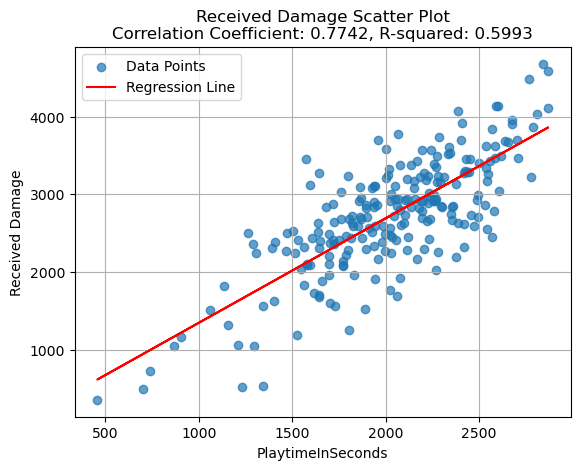

Correlation Coefficient: 0.7742
R-squared: 0.5993


In [46]:
# FOR DAMAGE

plt.scatter(df['PlaytimeInSeconds'], df['Damage'], alpha=0.7, label='Data Points')

# Fit a linear regression line
coefficients = np.polyfit(df['PlaytimeInSeconds'], df['Damage'], 1)
line = np.polyval(coefficients, df['PlaytimeInSeconds'])
plt.plot(df['PlaytimeInSeconds'], line, color='red', label='Regression Line')




# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['PlaytimeInSeconds'], df['Damage'])[0, 1]

# Calculate the coefficient of determination (R-squared)
r_squared = correlation_coefficient**2





plt.title(f'Damage Scatter Plot\nCorrelati aon Coefficient: {correlation_coefficient:.4f}, R-squared: {r_squared:.4f}')
plt.xlabel('PlaytimeInSeconds')
plt.ylabel('Damage')
plt.legend()
plt.grid(True)
plt.show()

# Print the correlation coefficient and R-squared
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'R-squared: {r_squared:.4f}')







# FOR RECEIVED DAMAGE

plt.scatter(df['PlaytimeInSeconds'], df['Received Damage'], alpha=0.7, label='Data Points')

# Fit a linear regression line
coefficients = np.polyfit(df['PlaytimeInSeconds'], df['Received Damage'], 1)
line = np.polyval(coefficients, df['PlaytimeInSeconds'])
plt.plot(df['PlaytimeInSeconds'], line, color='red', label='Regression Line')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(df['PlaytimeInSeconds'], df['Received Damage'])[0, 1]

# Calculate the coefficient of determination (R-squared)
r_squared = correlation_coefficient**2





plt.title(f'Received Damage Scatter Plot\nCorrelation Coefficient: {correlation_coefficient:.4f}, R-squared: {r_squared:.4f}')
plt.xlabel('PlaytimeInSeconds')
plt.ylabel('Received Damage')
plt.legend()
plt.grid(True)
plt.show()

# Print the correlation coefficient and R-squared
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')
print(f'R-squared: {r_squared:.4f}')




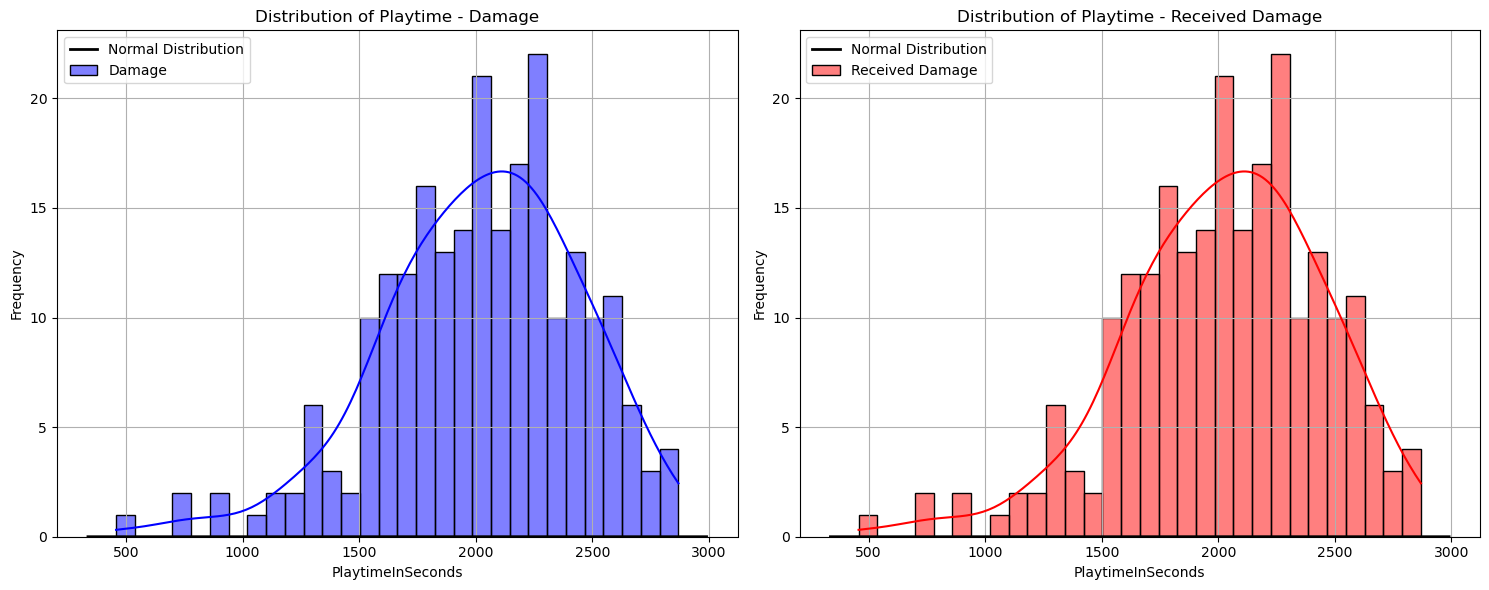

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram and normal distribution for 'Damage'
sns.histplot(df['PlaytimeInSeconds'], bins=30, kde=True, ax=axes[0], color='blue', label='Damage')
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['PlaytimeInSeconds'].mean(), df['PlaytimeInSeconds'].std())
axes[0].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
axes[0].set_title('Distribution of Playtime - Damage')
axes[0].set_xlabel('PlaytimeInSeconds')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Histogram and normal distribution for 'Received Damage'
sns.histplot(df['PlaytimeInSeconds'], bins=30, kde=True, ax=axes[1], color='red', label='Received Damage')
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['PlaytimeInSeconds'].mean(), df['PlaytimeInSeconds'].std())
axes[1].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
axes[1].set_title('Distribution of Playtime - Received Damage')
axes[1].set_xlabel('PlaytimeInSeconds')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)




plt.tight_layout()
plt.show()


#For Damage Scatter Plot

The correlation coefficient of 0.4252 indicates a moderate positive correlation between playtime and damage. However, the R-squared value of 0.1808 suggests that only approximately 18.08% of the variance in damage can be explained by playtime. In the end, there is a weak positive correlation. Moreover, Normal Distribution is seen.

#For Received Damage Scatter Plot

A correlation coefficient of 0.7742 indicates a strong positive relationship between the playtime and received damage. The R-squared value of 0.5993 suggests that approximately 60% of the variability in the dependent received damage can be explained by changes in the independent playtime. In the end, there is a strong positive correlation. Moreover, Normal Distribution is seen.

# Pearson Testing

The reason why I chose Pearson testing is because there is linearity and the data has normal distrubution.
The Pearson correlation for damage coefficient will be used to quantify the strength and direction of the linear relationship between playtime and the damage. The same process will be applied to received damage. 
I will be analyzing damage and received damage’s relation with time separately then compare damage-playtime and received damage-playtime relations. Therefore, for hypothesis testing my hypothesis will be:



For damage:
As my playtime increases, there is a corresponding rise in my damage.


For received damage:
As my playtime increases, there is a corresponding rise in my received damage.


A positive correlation coefficient would support those hypothesis. In addition, received damage's pearson correlation coefficient being higher supports my main hypothesis.

#For Damage

In [17]:

correlation_coefficient, p_value = pearsonr(df['PlaytimeInSeconds'], df['Damage'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")

alpha = 0.05  

if p_value < alpha:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a statistically significant positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a statistically significant negative correlation.")
    else:
        print("The variables are linearly independent.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.42522309438843275
P-Value: 1.8009440673632214e-11
The correlation is statistically significant.
There is a statistically significant positive correlation.


#For Received Damage

In [18]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['PlaytimeInSeconds'], df['Received Damage'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-Value: {p_value}")


alpha = 0.05  

if p_value < alpha:
    print("The correlation is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a statistically significant positive correlation.")
    elif correlation_coefficient < 0:
        print("There is a statistically significant negative correlation.")
    else:
        print("The variables are linearly independent.")
else:
    print("The correlation is not statistically significant.")


Pearson Correlation Coefficient: 0.7741574956181136
P-Value: 5.635296636492636e-47
The correlation is statistically significant.
There is a statistically significant positive correlation.


It is found that my hypothesis are significant and received damage having a stronger relationship with playtime supported my main hypothesis. However, let's not be biased and check other factors that might be affecting the hypothesis.

1)Agent

2)Map

3)Rank

these are the factors that might support my hypothesis (or not). So now, let's check the outliers

# 1) Agent

Agents are the characters you play with in Valorant. Each of them has unique abilities, and those abilities appoints the agent's role. These are the roles:



Controllers: 



Controllers in Valorant are the agents that have the abilitiy to use smokes. With their smokes, agents are able to block off certain areas of the map to make offensive or defense easier. Agents: Brimstone, Viper, Omen, Astra

Duelists:



These agents excel in one-vs-one fights and their goal is to win their duels. These are offensive agents. Agents: Phoenix, Jett, Reyna, Raze, Yoru

Initiators:



Initiators are the supportive class of agents in Valorant who have abilities that allow them to provide information to the team. Agents: Sova, Breach, Skye

Sentinels:



Sentinels are the defensive class of agents in Valorant. These agents typically slow down or sometimes outright stop enemy pushes on certain areas of the map. Agents: Killjoy, Cypher, Sage




In summary, the expected damage from a duelist is higher than the sentinel. However, it still depends on the 
player's skills as well. Therefore, as an extra in this part I'll be finding which agent suits me the best.
and for the hypothesis, first I'll get rid of the agents whose count is smaller than 10 (By count I mean the number of matches I played with that agent) then I'll create a scatter plot for each agent and get the slope of both received and dealt damage by playtime. In the end, if the number of the agents whose received damage bar is higher than the damage bar is more, then it'll support my hypothesis. 

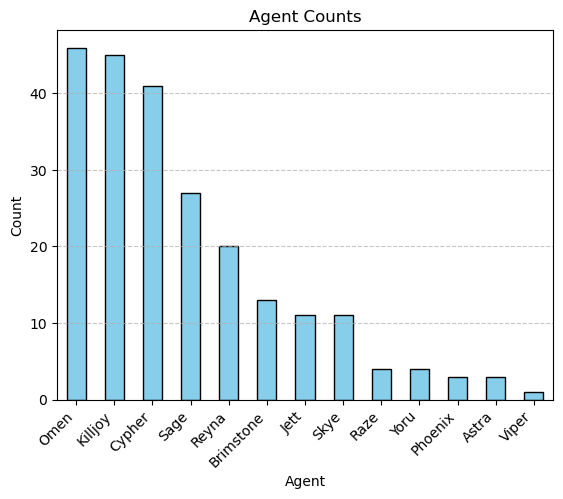

In [19]:
agent_counts = df['Agent'].value_counts()


agent_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Agent Counts')
plt.xlabel('Agent')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


I decided to get rid of the agents whose count is less than 10. In other words less than 10 matches.

Here, I found the correlation between each agent's damage and playtime, and  each agent's received damage and playtime relationships

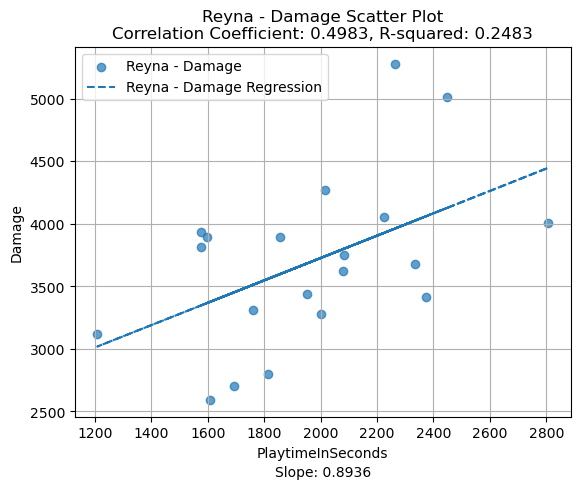

Reyna - Damage:
Correlation Coefficient: 0.4983
R-squared: 0.2483


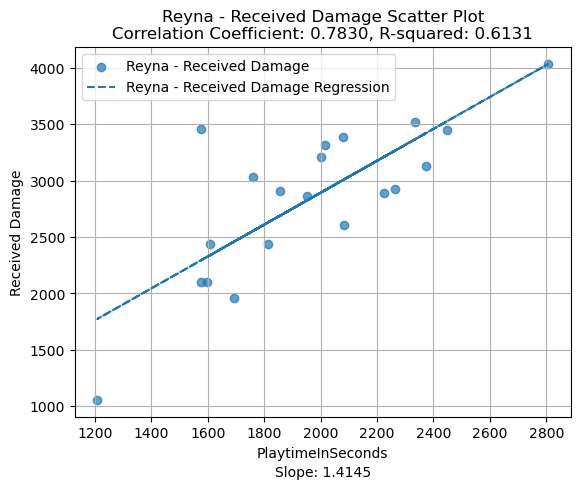

Reyna - Received Damage:
Correlation Coefficient: 0.7830
R-squared: 0.6131


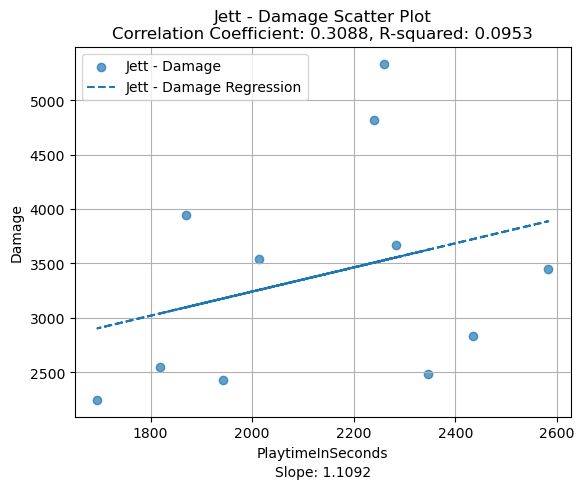

Jett - Damage:
Correlation Coefficient: 0.3088
R-squared: 0.0953


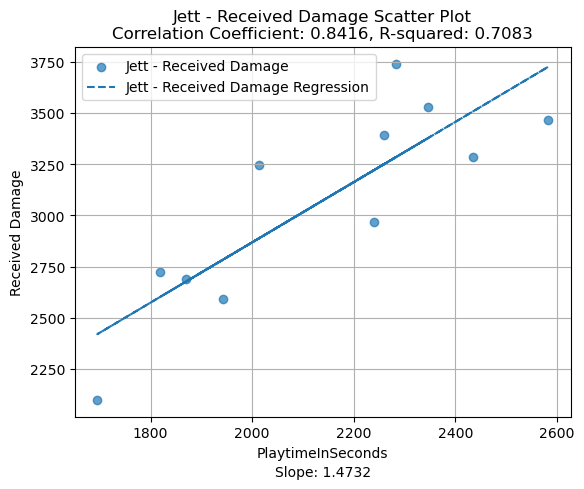

Jett - Received Damage:
Correlation Coefficient: 0.8416
R-squared: 0.7083


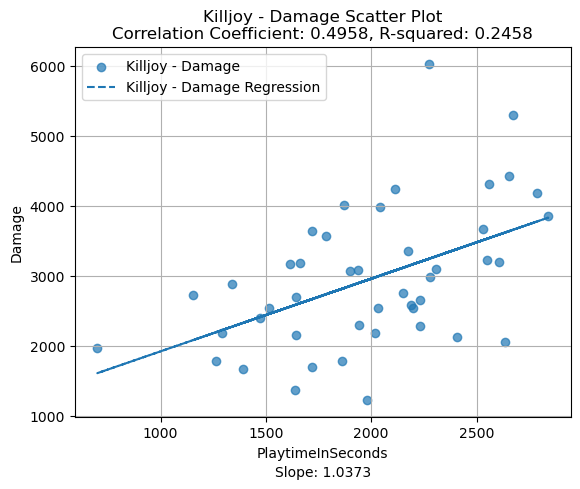

Killjoy - Damage:
Correlation Coefficient: 0.4958
R-squared: 0.2458


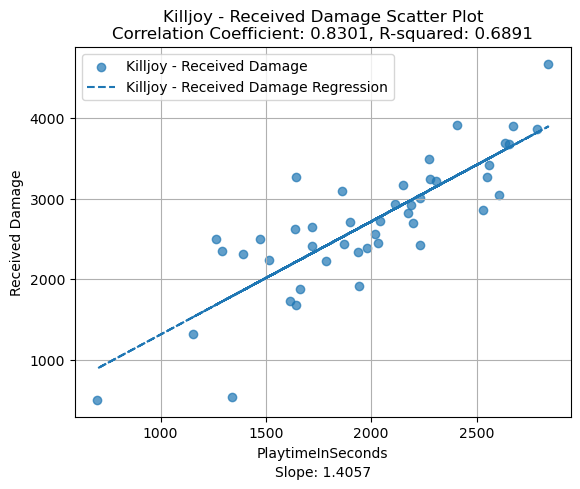

Killjoy - Received Damage:
Correlation Coefficient: 0.8301
R-squared: 0.6891


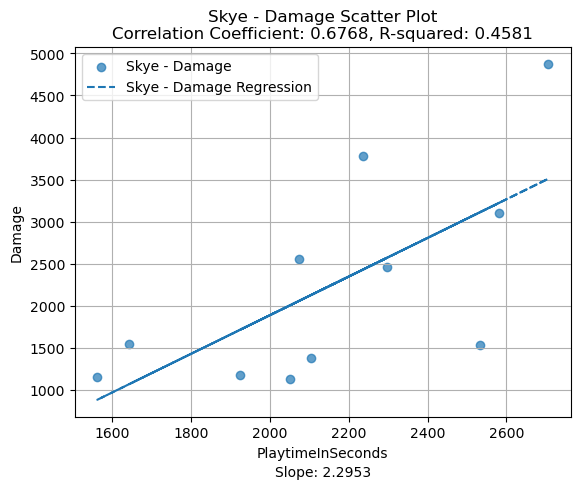

Skye - Damage:
Correlation Coefficient: 0.6768
R-squared: 0.4581


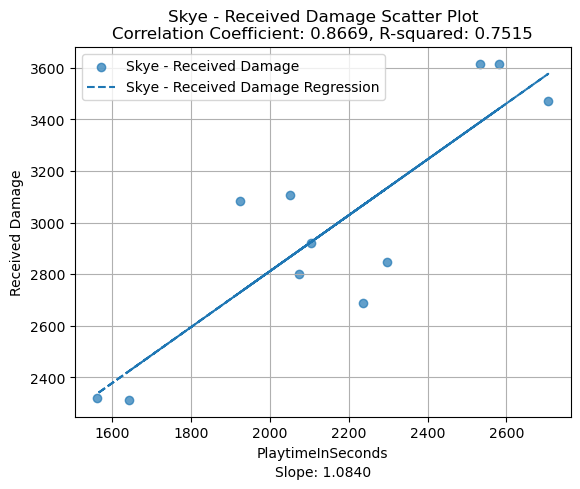

Skye - Received Damage:
Correlation Coefficient: 0.8669
R-squared: 0.7515


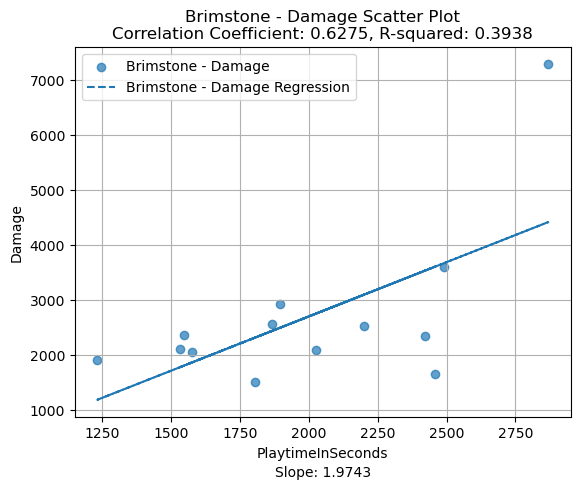

Brimstone - Damage:
Correlation Coefficient: 0.6275
R-squared: 0.3938


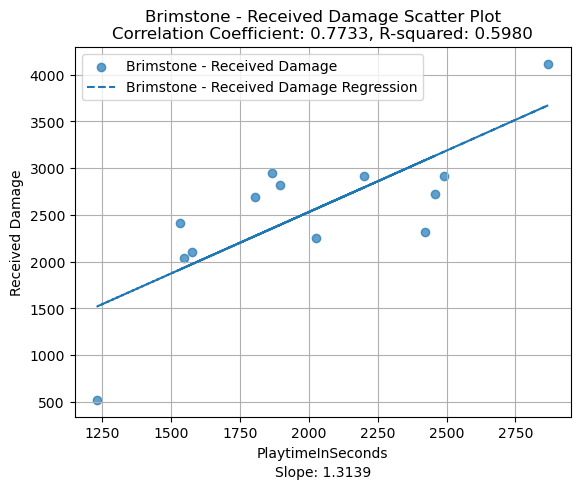

Brimstone - Received Damage:
Correlation Coefficient: 0.7733
R-squared: 0.5980


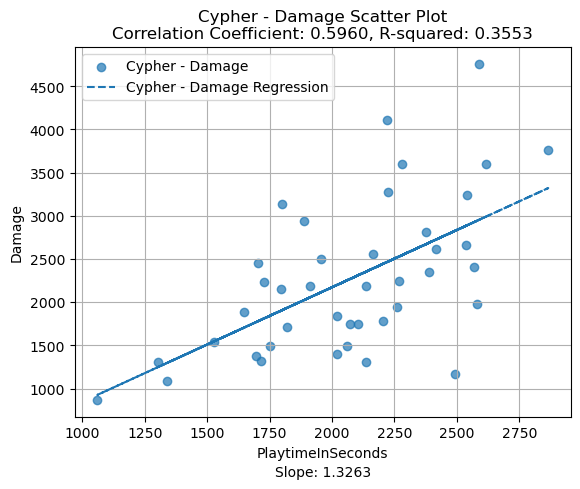

Cypher - Damage:
Correlation Coefficient: 0.5960
R-squared: 0.3553


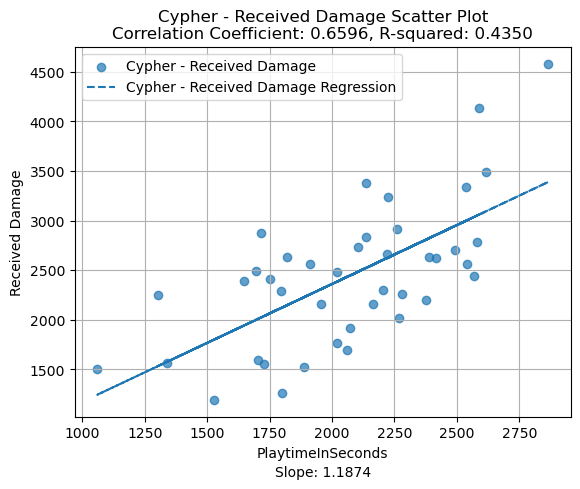

Cypher - Received Damage:
Correlation Coefficient: 0.6596
R-squared: 0.4350


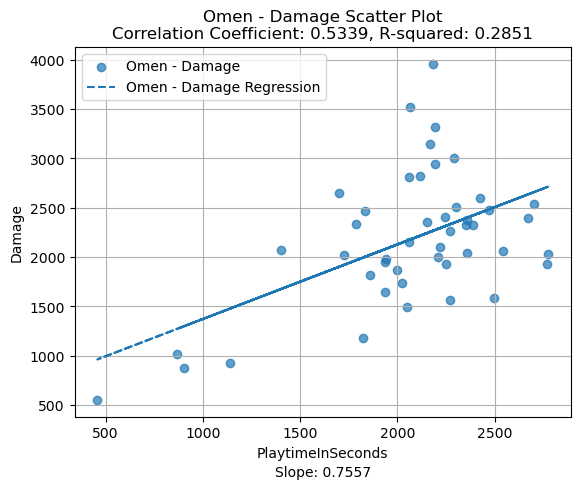

Omen - Damage:
Correlation Coefficient: 0.5339
R-squared: 0.2851


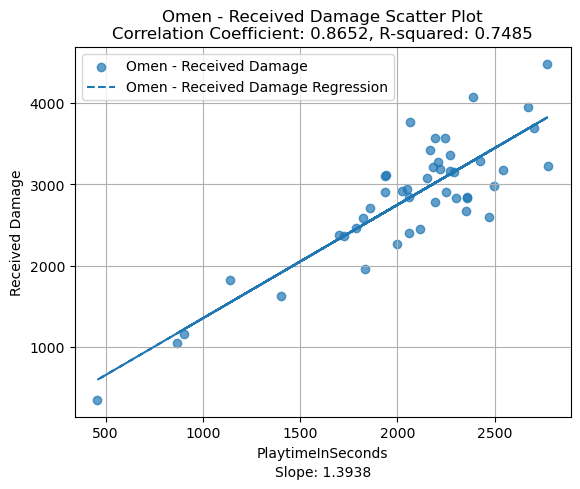

Omen - Received Damage:
Correlation Coefficient: 0.8652
R-squared: 0.7485


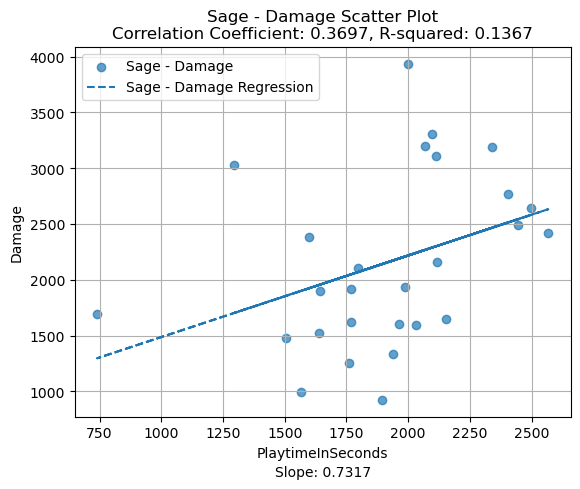

Sage - Damage:
Correlation Coefficient: 0.3697
R-squared: 0.1367


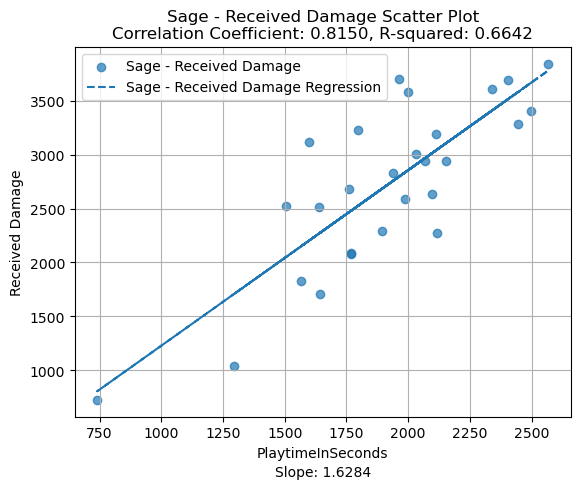

Sage - Received Damage:
Correlation Coefficient: 0.8150
R-squared: 0.6642


In [20]:

specific_agents = ['Reyna', 'Jett', 'Killjoy', 'Skye', 'Brimstone', 'Cypher','Omen','Sage']

for agent in specific_agents:
    agent_df = df[df['Agent'] == agent]
    plt.scatter(agent_df['PlaytimeInSeconds'], agent_df['Damage'], alpha=0.7, label=f'{agent} - Damage')
    
    # FOR DAMAGE

    # Fit a linear regression line for Damage
    coefficients_damage = np.polyfit(agent_df['PlaytimeInSeconds'], agent_df['Damage'], 1)
    line_damage = np.polyval(coefficients_damage, agent_df['PlaytimeInSeconds'])
    plt.plot(agent_df['PlaytimeInSeconds'], line_damage, label=f'{agent} - Damage Regression', linestyle='--')

    # Calculate the correlation coefficient and R-squared for Damage
    correlation_coefficient_damage = np.corrcoef(agent_df['PlaytimeInSeconds'], agent_df['Damage'])[0, 1]
    r_squared_damage = correlation_coefficient_damage ** 2

    plt.title(f'{agent} - Damage Scatter Plot\nCorrelation Coefficient: {correlation_coefficient_damage:.4f}, R-squared: {r_squared_damage:.4f}')
    plt.xlabel('PlaytimeInSeconds')
    plt.ylabel('Damage')
    plt.legend()
    plt.grid(True)

    # Annotate the slope below the graph
    plt.annotate(f'Slope: {coefficients_damage[0]:.4f}', xy=(0.5, -0.15), xycoords="axes fraction", ha="center", va="center", fontsize=10)

    plt.show()

    # Print the correlation coefficient and R-squared for Damage
    print(f'{agent} - Damage:')
    print(f'Correlation Coefficient: {correlation_coefficient_damage:.4f}')
    print(f'R-squared: {r_squared_damage:.4f}')

    
    
    
    
    # FOR RECEIVED DAMAGE
    plt.scatter(agent_df['PlaytimeInSeconds'], agent_df['Received Damage'], alpha=0.7, label=f'{agent} - Received Damage')

    # Fit a linear regression line for Received Damage
    coefficients_received_damage = np.polyfit(agent_df['PlaytimeInSeconds'], agent_df['Received Damage'], 1)
    line_received_damage = np.polyval(coefficients_received_damage, agent_df['PlaytimeInSeconds'])
    plt.plot(agent_df['PlaytimeInSeconds'], line_received_damage, label=f'{agent} - Received Damage Regression', linestyle='--')

    # Calculate the correlation coefficient and R-squared for Received Damage
    correlation_coefficient_received_damage = np.corrcoef(agent_df['PlaytimeInSeconds'], agent_df['Received Damage'])[0, 1]
    r_squared_received_damage = correlation_coefficient_received_damage ** 2

    plt.title(f'{agent} - Received Damage Scatter Plot\nCorrelation Coefficient: {correlation_coefficient_received_damage:.4f}, R-squared: {r_squared_received_damage:.4f}')
    plt.xlabel('PlaytimeInSeconds')
    plt.ylabel('Received Damage')
    plt.legend()
    plt.grid(True)

    # Annotate the slope below the graph
    plt.annotate(f'Slope: {coefficients_received_damage[0]:.4f}', xy=(0.5, -0.15), xycoords="axes fraction", ha="center", va="center", fontsize=10)

    plt.show()

    print(f'{agent} - Received Damage:')
    print(f'Correlation Coefficient: {correlation_coefficient_received_damage:.4f}')
    print(f'R-squared: {r_squared_received_damage:.4f}')


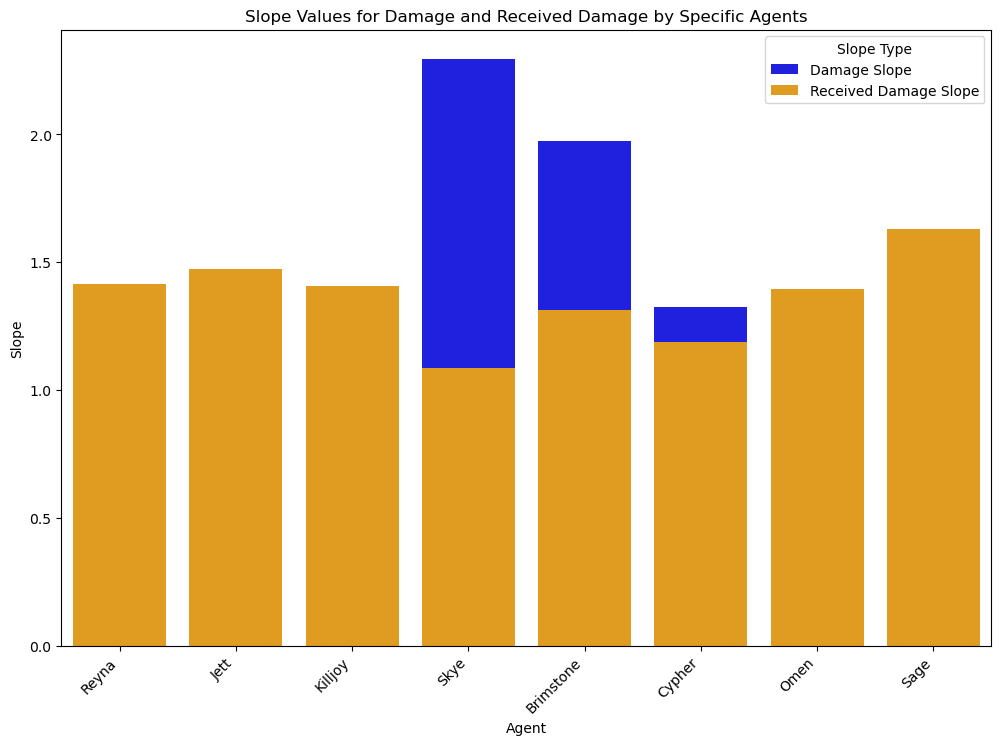

In [21]:
specific_agents = ['Reyna', 'Jett', 'Killjoy', 'Skye', 'Brimstone', 'Cypher', 'Omen', 'Sage']

# Create lists to store slope values
agents = []
damage_slopes = []
received_damage_slopes = []

for agent in specific_agents:

    agent_df = df[df['Agent'] == agent]
    # Fit a linear regression line for Damage
    coefficients_damage = np.polyfit(agent_df['PlaytimeInSeconds'], agent_df['Damage'], 1)
    damage_slope = coefficients_damage[0]
    # Fit a linear regression line for Received Damage
    coefficients_received_damage = np.polyfit(agent_df['PlaytimeInSeconds'], agent_df['Received Damage'], 1)
    received_damage_slope = coefficients_received_damage[0]
    
    
    # Append values to the lists
    agents.append(agent)
    damage_slopes.append(damage_slope)
    received_damage_slopes.append(received_damage_slope)

slopes_df = pd.DataFrame({
    'Agent': agents,
    'Damage_Slope': damage_slopes,
    'ReceivedDamage_Slope': received_damage_slopes
})

# Create a bar chart for slope values
plt.figure(figsize=(12, 8))
sns.barplot(x='Agent', y='Damage_Slope', data=slopes_df, color='blue', label='Damage Slope')
sns.barplot(x='Agent', y='ReceivedDamage_Slope', data=slopes_df, color='orange', label='Received Damage Slope')

plt.title('Slope Values for Damage and Received Damage by Specific Agents')
plt.xlabel('Agent')
plt.ylabel('Slope')
plt.legend(title='Slope Type', loc='upper right')
plt.xticks(rotation=45, ha='right')


plt.show()


Overall, it can be seen that there is a stronger positive correlation between playtime and received damage compared to the correlation between playtime and damage. In other words, as playtime increases, the increase in received damage is more pronounced than the increase in damage so it supports my hypothesis. In the end, agent factor does support my hypothesis and also one of the causation.

Extra: Skye is the most suitable agent for me to play.

# 2) Map

The maps in my dataset has 2 sites (except Haven has 3 sites) and each of them is different. Therefore, it might be a factor that affects my hypothesis.
First, I'am going to count the maps and get rid the ones I played less than 10 matches. Then, I'll create scatter plots to see if there is a positive relationship between damage-playtime and received damage-playtime. In the end, if overall number of maps has higher received damage-playtime than damage-playtime then it will support my hypothesis. In addition I'll be able to find the best map I play with.

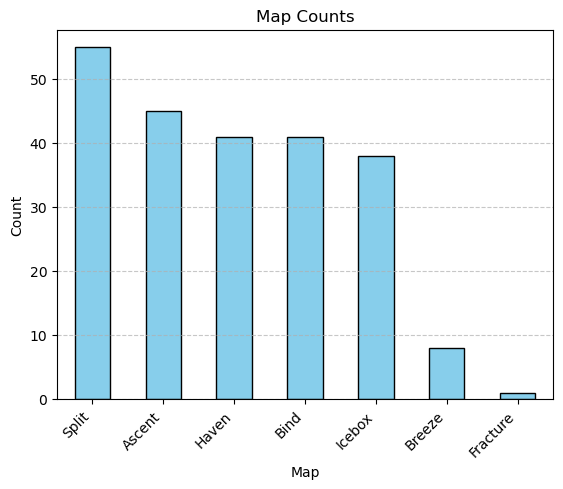

In [22]:
map_counts = df['Map'].value_counts()
map_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Map Counts')
plt.xlabel('Map')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


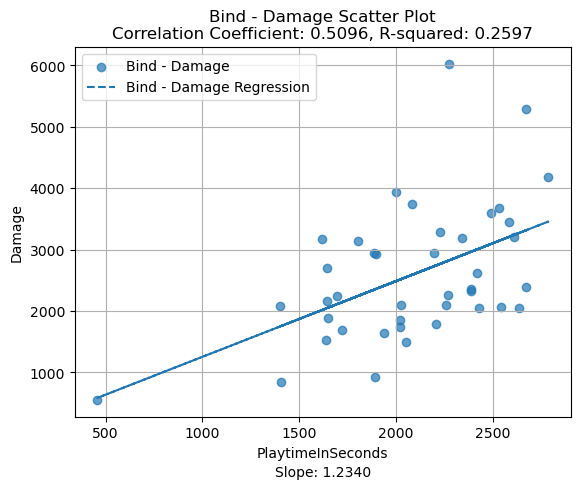

Bind - Damage:
Correlation Coefficient: 0.5096
R-squared: 0.2597


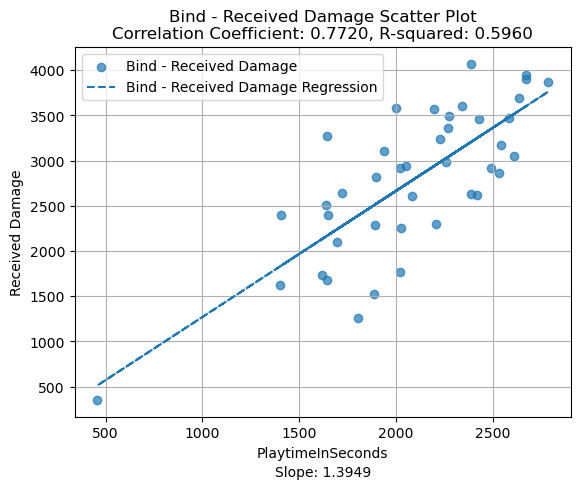

Bind - Received Damage:
Correlation Coefficient: 0.7720
R-squared: 0.5960


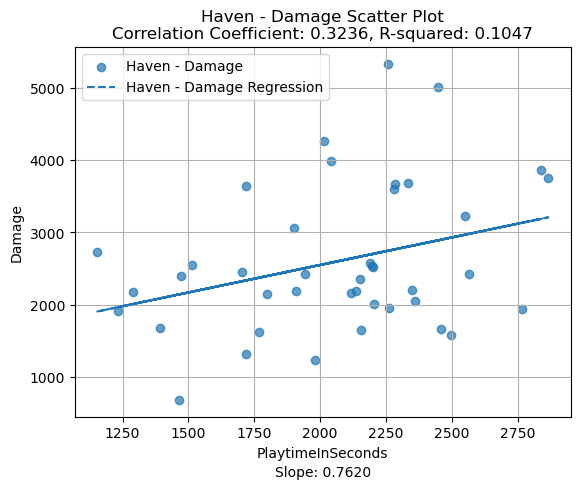

Haven - Damage:
Correlation Coefficient: 0.3236
R-squared: 0.1047


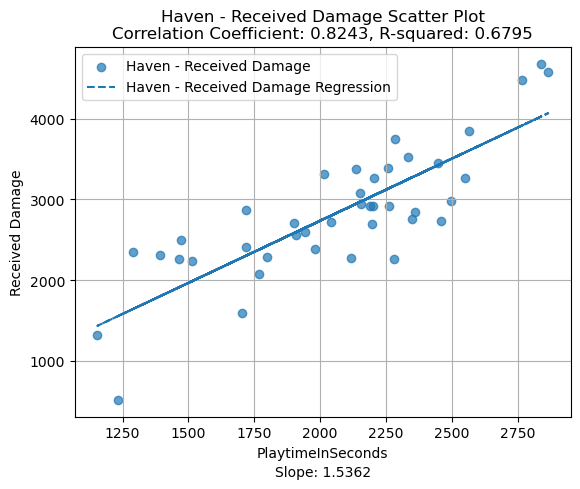

Haven - Received Damage:
Correlation Coefficient: 0.8243
R-squared: 0.6795


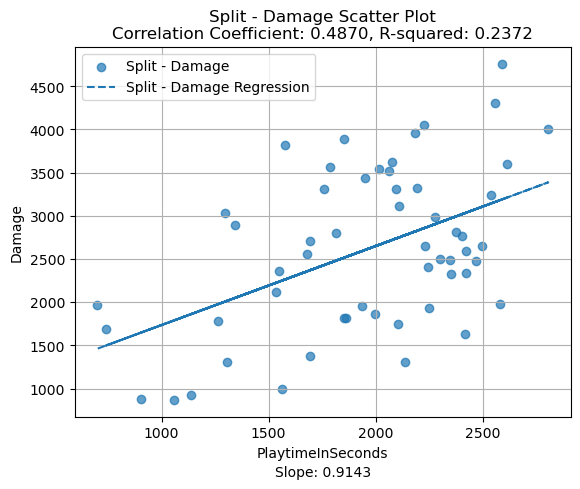

Split - Damage:
Correlation Coefficient: 0.4870
R-squared: 0.2372


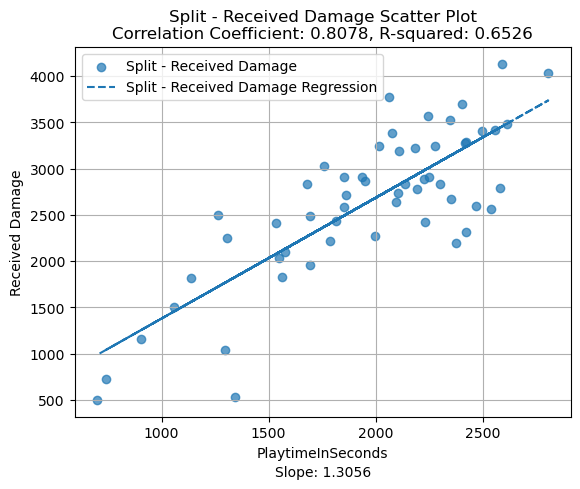

Split - Received Damage:
Correlation Coefficient: 0.8078
R-squared: 0.6526


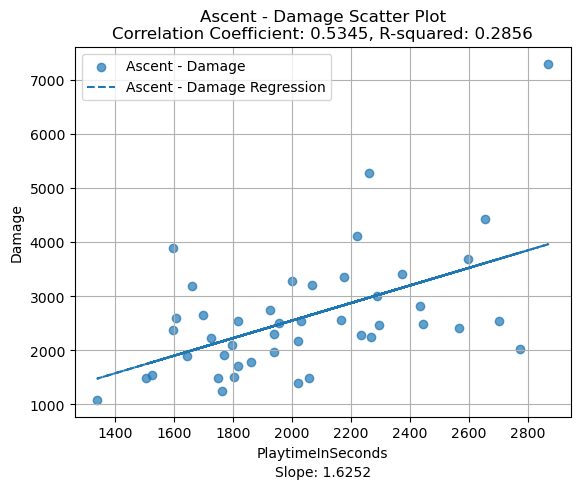

Ascent - Damage:
Correlation Coefficient: 0.5345
R-squared: 0.2856


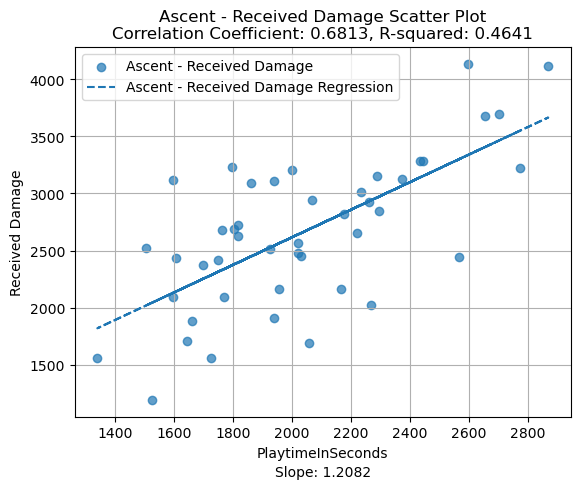

Ascent - Received Damage:
Correlation Coefficient: 0.6813
R-squared: 0.4641


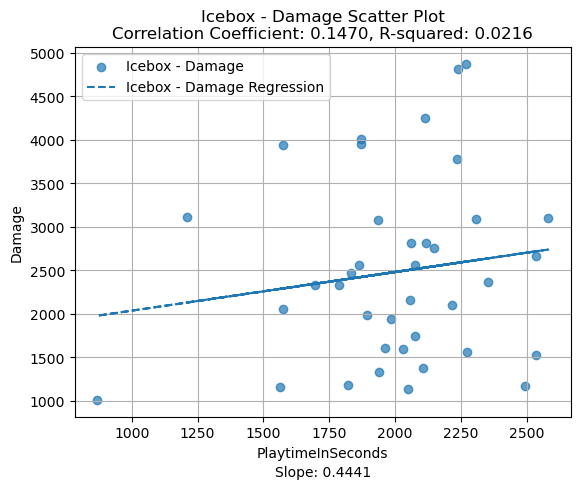

Icebox - Damage:
Correlation Coefficient: 0.1470
R-squared: 0.0216


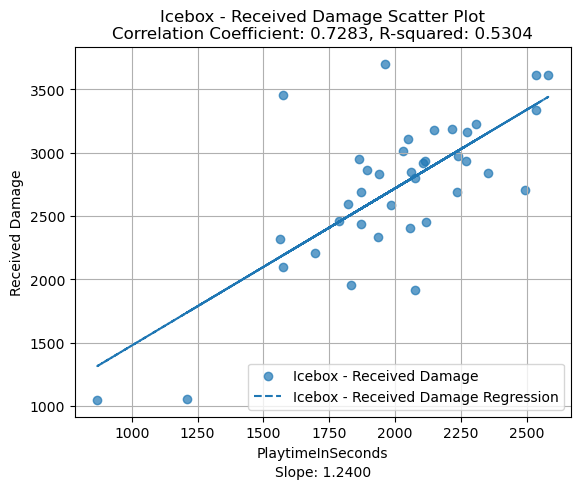

Icebox - Received Damage:
Correlation Coefficient: 0.7283
R-squared: 0.5304


In [23]:
specific_maps = ['Bind', 'Haven', 'Split', 'Ascent', 'Icebox']

for map_name in specific_maps:
    map_df = df[df['Map'] == map_name]
    
    
    #FOR DAMAGE

    plt.scatter(map_df['PlaytimeInSeconds'], map_df['Damage'], alpha=0.7, label=f'{map_name} - Damage')

    # Fit a linear regression line for Damage
    coefficients_damage = np.polyfit(map_df['PlaytimeInSeconds'], map_df['Damage'], 1)
    line_damage = np.polyval(coefficients_damage, map_df['PlaytimeInSeconds'])
    plt.plot(map_df['PlaytimeInSeconds'], line_damage, label=f'{map_name} - Damage Regression', linestyle='--')

    # Calculate the correlation coefficient and R-squared for Damage
    correlation_coefficient_damage = np.corrcoef(map_df['PlaytimeInSeconds'], map_df['Damage'])[0, 1]
    r_squared_damage = correlation_coefficient_damage ** 2

    plt.title(f'{map_name} - Damage Scatter Plot\nCorrelation Coefficient: {correlation_coefficient_damage:.4f}, R-squared: {r_squared_damage:.4f}')
    plt.xlabel('PlaytimeInSeconds')
    plt.ylabel('Damage')
    plt.legend()
    plt.grid(True)

    plt.annotate(f'Slope: {coefficients_damage[0]:.4f}', xy=(0.5, -0.15), xycoords="axes fraction", ha="center", va="center", fontsize=10)

    plt.show()

    # Print the correlation coefficient and R-squared for Damage
    print(f'{map_name} - Damage:')
    print(f'Correlation Coefficient: {correlation_coefficient_damage:.4f}')
    print(f'R-squared: {r_squared_damage:.4f}')


    
    
    
    #FOR RECEIVED DAMAGE
    
    plt.scatter(map_df['PlaytimeInSeconds'], map_df['Received Damage'], alpha=0.7, label=f'{map_name} - Received Damage')

    # Fit a linear regression line for Received Damage
    coefficients_received_damage = np.polyfit(map_df['PlaytimeInSeconds'], map_df['Received Damage'], 1)
    line_received_damage = np.polyval(coefficients_received_damage, map_df['PlaytimeInSeconds'])
    plt.plot(map_df['PlaytimeInSeconds'], line_received_damage, label=f'{map_name} - Received Damage Regression', linestyle='--')

    # Calculate the correlation coefficient and R-squared for Received Damage
    correlation_coefficient_received_damage = np.corrcoef(map_df['PlaytimeInSeconds'], map_df['Received Damage'])[0, 1]
    r_squared_received_damage = correlation_coefficient_received_damage ** 2

    plt.title(f'{map_name} - Received Damage Scatter Plot\nCorrelation Coefficient: {correlation_coefficient_received_damage:.4f}, R-squared: {r_squared_received_damage:.4f}')
    plt.xlabel('PlaytimeInSeconds')
    plt.ylabel('Received Damage')
    plt.legend()
    plt.grid(True)

    # Annotate the slope below the graph
    plt.annotate(f'Slope: {coefficients_received_damage[0]:.4f}', xy=(0.5, -0.15), xycoords="axes fraction", ha="center", va="center", fontsize=10)

    plt.show()

    # Print the correlation coefficient and R-squared for Received Damage
    print(f'{map_name} - Received Damage:')
    print(f'Correlation Coefficient: {correlation_coefficient_received_damage:.4f}')
    print(f'R-squared: {r_squared_received_damage:.4f}')


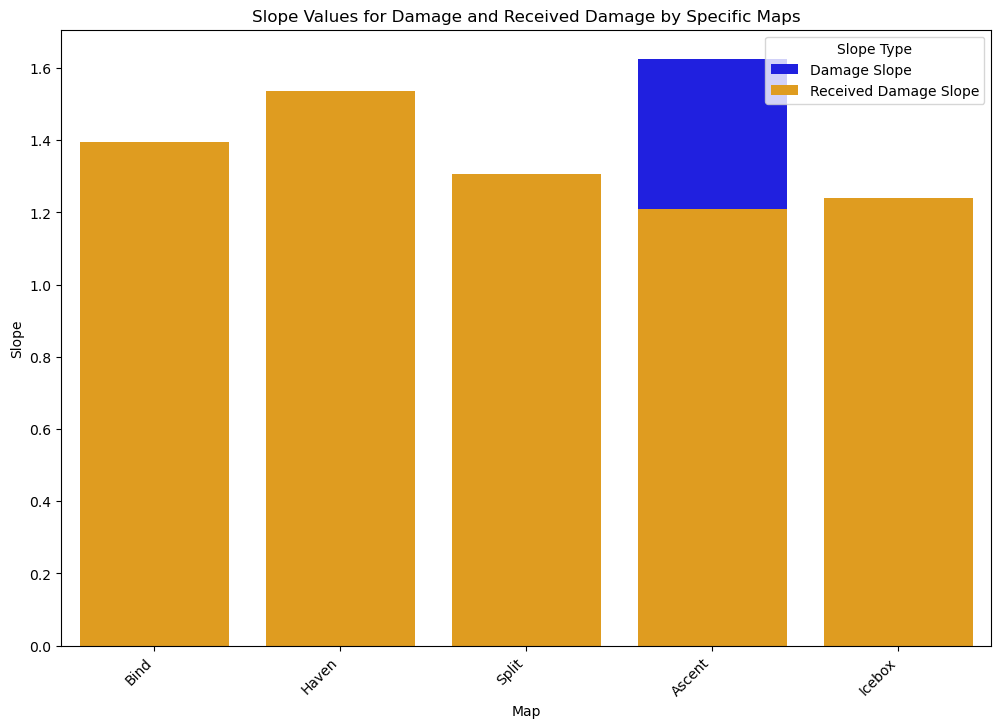

In [24]:
specific_maps = ['Bind', 'Haven', 'Split', 'Ascent', 'Icebox']

# Create lists to store slope values
maps = []
damage_slopes = []
received_damage_slopes = []

for map_name in specific_maps:
    map_df = df[df['Map'] == map_name]

    # Fit a linear regression line for Damage
    coefficients_damage = np.polyfit(map_df['PlaytimeInSeconds'], map_df['Damage'], 1)
    damage_slope = coefficients_damage[0]

    # Fit a linear regression line for Received Damage
    coefficients_received_damage = np.polyfit(map_df['PlaytimeInSeconds'], map_df['Received Damage'], 1)
    received_damage_slope = coefficients_received_damage[0]

    # Append values to the lists
    maps.append(map_name)
    damage_slopes.append(damage_slope)
    received_damage_slopes.append(received_damage_slope)

slopes_df = pd.DataFrame({
    'Map': maps,
    'Damage_Slope': damage_slopes,
    'ReceivedDamage_Slope': received_damage_slopes
})

# Create a bar chart for slope values
plt.figure(figsize=(12, 8))
sns.barplot(x='Map', y='Damage_Slope', data=slopes_df, color='blue', label='Damage Slope')
sns.barplot(x='Map', y='ReceivedDamage_Slope', data=slopes_df, color='orange', label='Received Damage Slope')

plt.title('Slope Values for Damage and Received Damage by Specific Maps')
plt.xlabel('Map')
plt.ylabel('Slope')
plt.legend(title='Slope Type', loc='upper right')
plt.xticks(rotation=45, ha='right')

# Show the combined bar chart
plt.show()


Overall, the number of maps had stronger received damage-playtime relation than damage-playtime. Therefore, Map is a supporting factor for my hypothesis and one of the causations.

Extra: The map I play my best with is Ascent.

# 3) Rank

In Valorant, by the result of your comptetive matches a rank is assigned to the player. The more you win the higher your rank is and more you lose, your rank gets lower. Now I'd like to see whether my received damage-playime slope was higher than the damage-playtime slope as my rank got higher. The ranks I was assigned and their order:

Iron 2< Iron 3< Bronze 1< Bronze 2< Bronze 3< Silver 1< Silver 2< Silver 3< Gold 1< Gold 2< Gold 3< Platinum 1

First, I get the rid of the ranks I played less than 10 matches. Then, I'll look at each rank's damage-playtime and received damage-playtime. After that, check whether there is an increase in the relation when the rank gets higher.

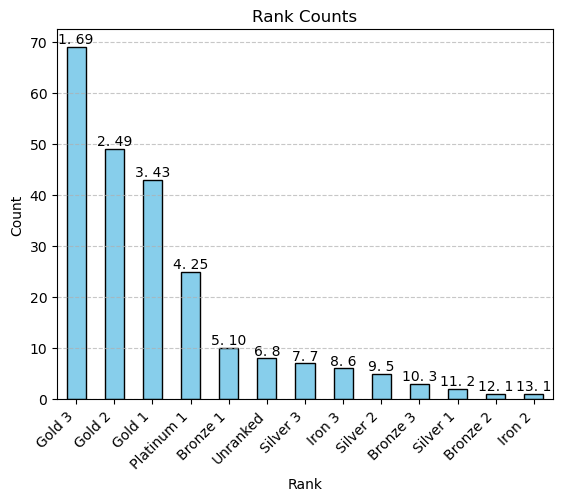

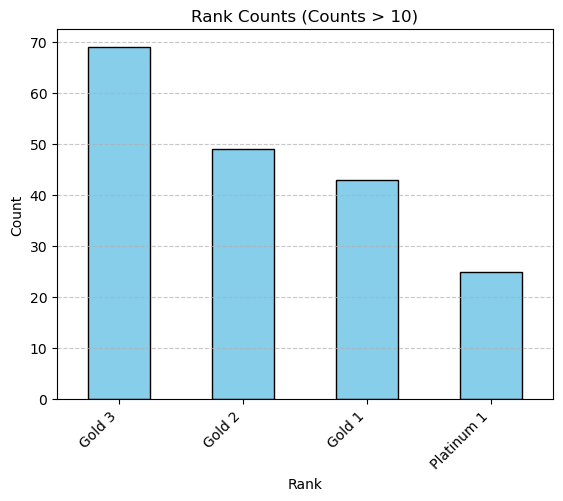

In [25]:
rank_counts = df['Rank'].value_counts()
rank_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rank Counts')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate with rank
for i, v in enumerate(rank_counts, start=1):
    plt.text(i - 1, v + 0.1, f'{i}. {v}', ha='center', va='bottom')

plt.show()


import matplotlib.pyplot as plt

rank_counts = df['Rank'].value_counts()

filtered_ranks = rank_counts[rank_counts > 10]

# Create a bar plot for filtered ranks
filtered_ranks.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rank Counts (Counts > 10)')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


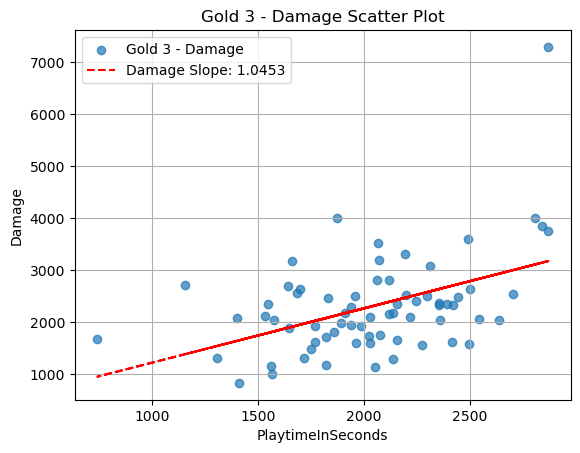

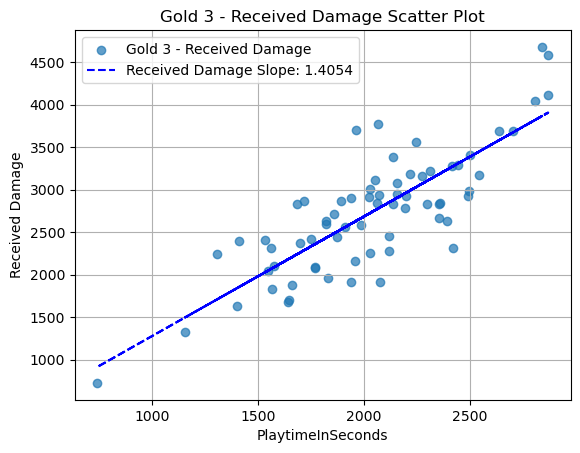

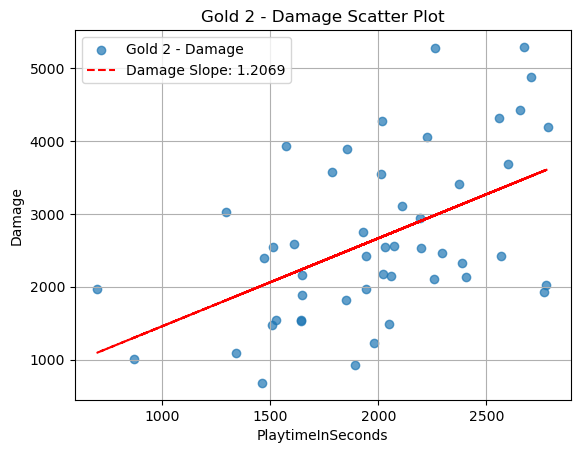

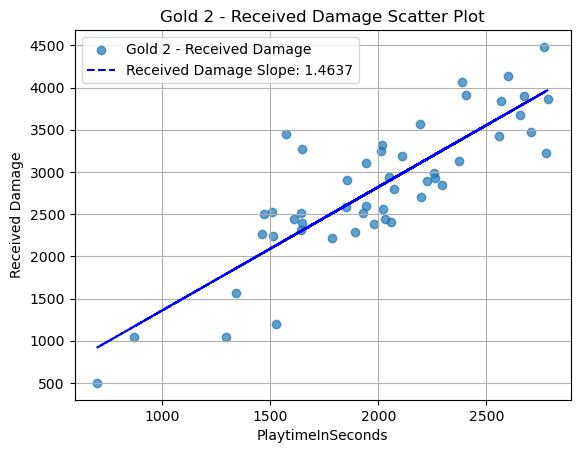

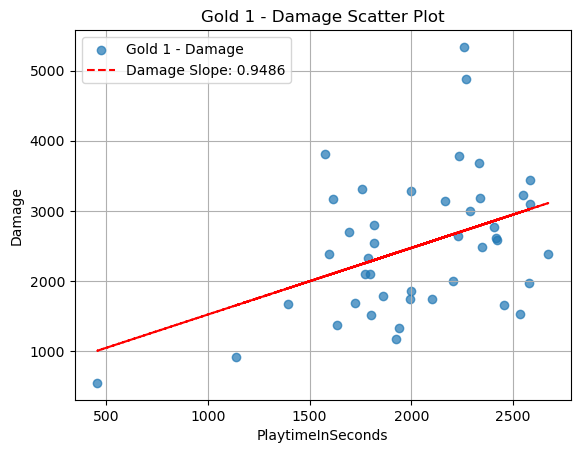

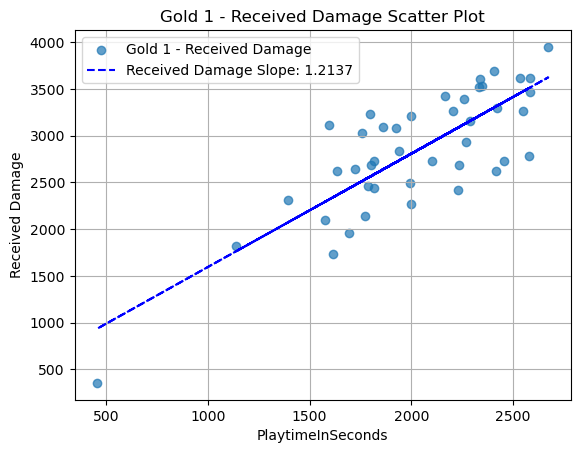

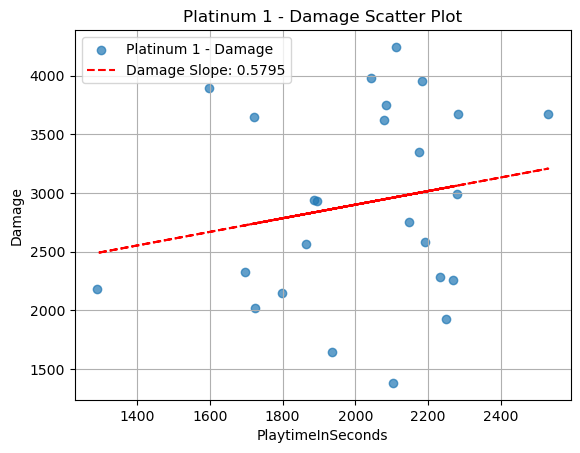

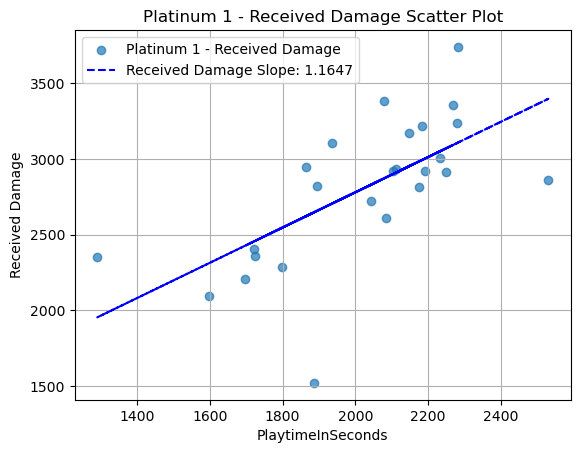

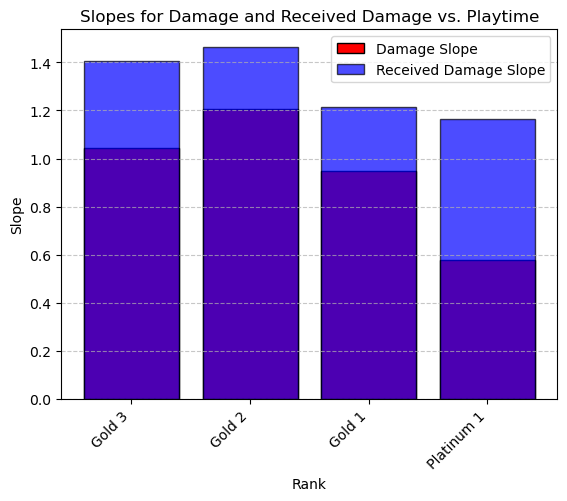

In [26]:
specific_ranks = ['Gold 3', 'Gold 2', 'Gold 1', 'Platinum 1']

damage_slopes = []
received_damage_slopes = []

for rank_name in specific_ranks:
    rank_df = df[df['Rank'] == rank_name]

    
    #FOR DAMAGE
    # Fit a linear regression line for Damage and Playtime
    coefficients_damage = np.polyfit(rank_df['PlaytimeInSeconds'], rank_df['Damage'], 1)
    damage_slope = coefficients_damage[0]

    # Append the damage slope to the list
    damage_slopes.append(damage_slope)

    # Create a scatter plot for Damage and Playtime with slope annotation
    plt.scatter(rank_df['PlaytimeInSeconds'], rank_df['Damage'], alpha=0.7, label=f'{rank_name} - Damage')
    plt.plot(rank_df['PlaytimeInSeconds'], np.polyval(coefficients_damage, rank_df['PlaytimeInSeconds']),
             label=f'Damage Slope: {damage_slope:.4f}', linestyle='--', color='red')

    plt.title(f'{rank_name} - Damage Scatter Plot')
    plt.xlabel('PlaytimeInSeconds')
    plt.ylabel('Damage')
    plt.legend()
    plt.grid(True)

    # Show the plot for Damage and Playtime
    plt.show()

    
    
    
    #FOR RECEIVED DAMAGE

    # Fit a linear regression line for Received Damage and Playtime
    coefficients_received_damage = np.polyfit(rank_df['PlaytimeInSeconds'], rank_df['Received Damage'], 1)
    received_damage_slope = coefficients_received_damage[0]

    # Append the received damage slope to the list
    received_damage_slopes.append(received_damage_slope)

    plt.scatter(rank_df['PlaytimeInSeconds'], rank_df['Received Damage'], alpha=0.7, label=f'{rank_name} - Received Damage')
    plt.plot(rank_df['PlaytimeInSeconds'], np.polyval(coefficients_received_damage, rank_df['PlaytimeInSeconds']),
             label=f'Received Damage Slope: {received_damage_slope:.4f}', linestyle='--', color='blue')

    plt.title(f'{rank_name} - Received Damage Scatter Plot')
    plt.xlabel('PlaytimeInSeconds')
    plt.ylabel('Received Damage')
    plt.legend()
    plt.grid(True)

    plt.show()

# Create bar charts for slopes
plt.bar(specific_ranks, damage_slopes, color='red', edgecolor='black', label='Damage Slope')
plt.bar(specific_ranks, received_damage_slopes, color='blue', edgecolor='black', label='Received Damage Slope', alpha=0.7)

plt.title('Slopes for Damage and Received Damage vs. Playtime')
plt.xlabel('Rank')
plt.ylabel('Slope')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


The received damage-playtime's relationship was higher than damage-playtime in each rank. However, there was not a correlation between that relationship and the ranks. Becasue received damage-playtime did not have a linear increase as the ranks got higher. Therefore, rank was not a causation for my hypothesis.

# Conclusion 

In the end, the hypothesis: "As my Playtime increases, a corresponding rise in my Damage is lower than the Damage I Receive." was proven to be correct. Agent and Map were supporting factors and the causation for this hypothesis. 


In other words, I was a burden to the team...

# ML: Linear Regression Model

#For Received Damage

This machine learning (ML) aims to find a relationship between the playtime and the Received Damage in Valorant.
It tries to predict Received Damage based on the Playtime

#For Damage

This machine learning (ML) aims to find a relationship between the playtime and the Damage in Valorant.
It tries to predict Damage based on the Playtime

It should predict that received damage-playtime slope should be higher than the damage-playtime slope

Mean Squared Error for Damage: 862149.1369


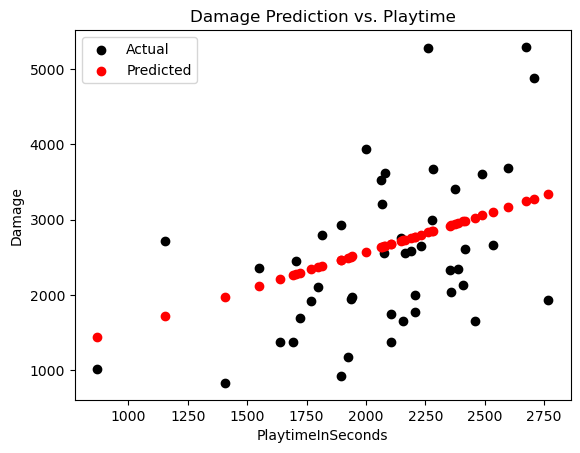

Mean Squared Error for Received Damage: 219514.2050


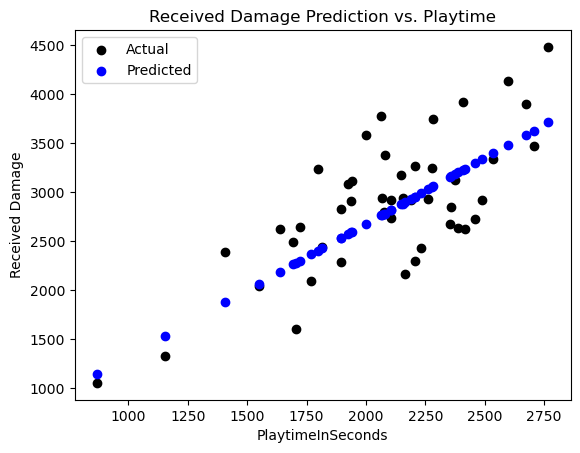

In [27]:
#FOR DAMAGE

# Selecting features and target variable for Damage
features_damage = df[['PlaytimeInSeconds']]
target_damage = df['Damage']

# Split the data into training and testing sets for Damage
X_damage_train, X_damage_test, y_damage_train, y_damage_test = train_test_split(features_damage, target_damage, test_size=0.2, random_state=42)

# Create linear regression model for Damage
model_damage = LinearRegression()

# Train the model
model_damage.fit(X_damage_train, y_damage_train)

# Make predictions on the testing set
y_damage_pred = model_damage.predict(X_damage_test)

# Evaluate the model
mse_damage = mean_squared_error(y_damage_test, y_damage_pred)
print(f'Mean Squared Error for Damage: {mse_damage:.4f}')

# Plot the predictions vs. actual values for Damage
plt.scatter(X_damage_test, y_damage_test, color='black', label='Actual')
plt.scatter(X_damage_test, y_damage_pred, color='red', label='Predicted')
plt.title('Damage Prediction vs. Playtime')
plt.xlabel('PlaytimeInSeconds')
plt.ylabel('Damage')
plt.legend()
plt.show()






#FOR RECEIVED DAMAGE

# Selecting features and target variable for Received Damage
features_received_damage = df[['PlaytimeInSeconds']]
target_received_damage = df['Received Damage']

# Split the data into training and testing sets for Received Damage
X_received_damage_train, X_received_damage_test, y_received_damage_train, y_received_damage_test = train_test_split(
    features_received_damage, target_received_damage, test_size=0.2, random_state=42
)

# Create linear regression model for Received Damage
model_received_damage = LinearRegression()

# Train the model
model_received_damage.fit(X_received_damage_train, y_received_damage_train)

# Make predictions on the testing set
y_received_damage_pred = model_received_damage.predict(X_received_damage_test)

# Evaluate the model
mse_received_damage = mean_squared_error(y_received_damage_test, y_received_damage_pred)
print(f'Mean Squared Error for Received Damage: {mse_received_damage:.4f}')

plt.scatter(X_received_damage_test, y_received_damage_test, color='black', label='Actual')
plt.scatter(X_received_damage_test, y_received_damage_pred, color='blue', label='Predicted')
plt.title('Received Damage Prediction vs. Playtime')
plt.xlabel('PlaytimeInSeconds')
plt.ylabel('Received Damage')
plt.legend()
plt.show()


In [40]:
damage_range = df['Damage'].agg(['min', 'max'])

print(f"Minimum Damage: {damage_range['min']}")
print(f"Maximum Damage: {damage_range['max']}")



damage_range = df['Received Damage'].agg(['min', 'max'])

print(f"Minimum Received Damage: {damage_range['min']}")
print(f"Maximum Received Damage: {damage_range['max']}")


Minimum Damage: 552
Maximum Damage: 7299
Minimum Received Damage: 354
Maximum Received Damage: 4677


Since the range is wide MSE for damage and received damage are reasonable.